In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt

In [2]:
text="Artificial intelligence (AI) stands as a pinnacle of human technological achievement, embodying our relentless pursuit to replicate and even surpass the capabilities of the human mind. At its core, AI seeks to imbue machines with the ability to perceive, reason, learn, and act intelligently, much like humans do. This multidisciplinary field draws inspiration from various disciplines, including computer science, mathematics, neuroscience, psychology, philosophy, and linguistics, weaving together a tapestry of knowledge to create intelligent systems.Machine learning, a subset of AI, has emerged as a dominant paradigm, enabling computers to learn from data and improve their performance over time without being explicitly programmed. Within machine learning, deep learning, inspired by the structure and function of the human brain's neural networks, has propelled AI to new heights of sophistication. Deep learning algorithms, with their hierarchical layers of interconnected nodes, have demonstrated remarkable prowess in tasks such as image recognition, natural language processing, and speech recognition, often surpassing human performance in specific domains.AI's impact spans virtually every aspect of human endeavor, revolutionizing industries, transforming economies, and reshaping societies. In healthcare, AI-powered diagnostic systems analyze medical images with precision and speed, aiding clinicians in early disease detection and treatment planning. In finance, algorithmic trading algorithms leverage AI to analyze vast datasets and make split-second decisions, shaping global markets. In transportation, autonomous vehicles promise safer, more efficient transportation systems, poised to redefine urban mobility.Yet, the proliferation of AI also raises profound questions and challenges. Ethical concerns regarding AI's societal impact, privacy implications, bias in algorithms, and the potential for job displacement loom large. The quest for AI raises philosophical questions about consciousness, morality, and the nature of intelligence itself. As AI systems become increasingly autonomous and capable, ensuring their accountability, transparency, and alignment with human values becomes imperative.The journey toward realizing the full potential of AI is ongoing, marked by breakthroughs, setbacks, and ethical dilemmas. It requires a collective effort from researchers, policymakers, industry leaders, and society at large to navigate the complex terrain of AI responsibly and ethically. As we stand on the cusp of an AI-powered future, the decisions we make today will shape the trajectory of humanity for generations to come. It is a journey fraught with challenges and uncertainties, yet brimming with promise and potential, as we endeavor to unlock the boundless possibilities of artificial intelligence while safeguarding the essence of what it means to be human.Artificial intelligence (AI) represents humanity's quest to replicate and surpass the cognitive abilities of the human mind. Drawing from diverse disciplines such as computer science, mathematics, neuroscience, and philosophy, AI seeks to imbue machines with the capacity to perceive, reason, learn, and act intelligently. Machine learning, a pivotal subset of AI, enables computers to learn from data and improve performance without explicit programming. Deep learning, inspired by neural networks, has propelled AI to new heights, excelling in tasks like image recognition and natural language processing. AI's impact spans industries, revolutionizing healthcare with diagnostic systems, transforming finance with algorithmic trading, and promising autonomous transportation systems. Yet, ethical concerns about societal impact, privacy, and bias abound. Philosophical questions about consciousness and morality emerge. As we navigate this complex landscape, ensuring AI's alignment with human values and accountability is paramount. The journey toward realizing AI's potential is marked by breakthroughs, setbacks, and ethical dilemmas, requiring collective effort to shape a future where AI enriches humanity while preserving its essence.Artificial intelligence (AI) has revolutionized the way we interact with technology, ushering in an era of unprecedented automation and efficiency. One of the most significant impacts of AI is in the realm of natural language processing (NLP). NLP enables machines to understand, interpret, and generate human language in a way that is both meaningful and useful. Applications such as virtual assistants, chatbots, and automated translators leverage NLP to provide real-time support and services, enhancing user experiences and accessibility. These systems can perform tasks ranging from answering simple questions to managing complex workflows, making them indispensable tools in both personal and professional settings. The ability of AI to process and analyze large volumes of text data has also transformed industries such as customer service, where AI-driven analytics provide deep insights into customer needs and preferences.Another transformative aspect of AI is its application in the field of healthcare. AI algorithms, particularly those based on machine learning and deep learning, have shown remarkable potential in diagnosing diseases, personalizing treatment plans, and predicting patient outcomes. For instance, AI systems can analyze medical images with high accuracy, often detecting anomalies that might be missed by human eyes. These capabilities are especially valuable in areas such as radiology, oncology, and pathology. Moreover, AI-powered predictive models can forecast disease outbreaks and monitor patient vitals in real-time, enabling proactive and preventive healthcare. The integration of AI into healthcare not only improves diagnostic precision but also enhances the efficiency of medical services, ultimately leading to better patient care and outcomes.AI's influence extends into the realm of autonomous systems, including self-driving cars, drones, and robotic process automation. Autonomous vehicles, powered by AI, are poised to revolutionize transportation by reducing accidents, optimizing traffic flow, and providing mobility solutions for those unable to drive. AI-driven drones are being used in various industries, from agriculture, where they monitor crop health, to logistics, where they facilitate efficient delivery services. In the corporate world, robotic process automation (RPA) uses AI to automate repetitive and mundane tasks, freeing human workers to focus on more strategic activities. These advancements not only enhance operational efficiency but also open up new possibilities for innovation and growth in numerous sectors.Despite the myriad benefits, the rise of AI also brings forth several ethical and societal challenges. One of the primary concerns is the potential for job displacement as automation becomes more prevalent. While AI can perform many tasks more efficiently than humans, this shift necessitates a rethinking of workforce development and the creation of new job opportunities. Additionally, issues such as data privacy, algorithmic bias, and the accountability of AI systems are critical areas that require careful consideration. Ensuring that AI technologies are developed and deployed in an ethical and responsible manner is paramount to maximizing their positive impact while mitigating potential risks. As AI continues to evolve, fostering an inclusive dialogue among stakeholders—including technologists, policymakers, and the public—is essential to navigate the complexities of this transformative technology."

In [3]:
print(text)

Artificial intelligence (AI) stands as a pinnacle of human technological achievement, embodying our relentless pursuit to replicate and even surpass the capabilities of the human mind. At its core, AI seeks to imbue machines with the ability to perceive, reason, learn, and act intelligently, much like humans do. This multidisciplinary field draws inspiration from various disciplines, including computer science, mathematics, neuroscience, psychology, philosophy, and linguistics, weaving together a tapestry of knowledge to create intelligent systems.Machine learning, a subset of AI, has emerged as a dominant paradigm, enabling computers to learn from data and improve their performance over time without being explicitly programmed. Within machine learning, deep learning, inspired by the structure and function of the human brain's neural networks, has propelled AI to new heights of sophistication. Deep learning algorithms, with their hierarchical layers of interconnected nodes, have demons

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
total_words=len(tokenizer.word_index)+1

In [5]:
input_sequence=[]
lines=text.split(".")

In [6]:
for line in lines:
    tokenized_line=tokenizer.texts_to_sequences([line.strip()])[0]
    for i in range(1,len(tokenized_line)):
        n_gram=tokenized_line[:i+1]
        input_sequence.append(n_gram)

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_input_length=max(len(x) for x in input_sequence)
input_sequence=np.array(pad_sequences(input_sequence,maxlen=max_input_length,padding='pre'))

In [8]:
X=input_sequence[:,:-1]
y=input_sequence[:,-1]

In [9]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=total_words)

In [10]:
input_layer= tfl.Input(shape=(max_input_length-1,))
embedding_layer=tfl.Embedding(total_words,50,input_length=max_input_length-1)(input_layer)
lstm_1=tfl.LSTM(128,return_sequences=True)(embedding_layer)
lstm_2=tfl.LSTM(64)(lstm_1)
output_layer=tfl.Dense(total_words,activation='softmax')(lstm_2)

In [11]:
from tensorflow.keras.models import Model
model=Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding (Embedding)       (None, 36, 50)            23950     
                                                                 
 lstm (LSTM)                 (None, 36, 128)           91648     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 479)               31135     
                                                                 
Total params: 196141 (766.18 KB)
Trainable params: 196141 (766.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/800


32/32 [==============================] - 6s 24ms/step - loss: 6.0924 - accuracy: 0.0325
Epoch 2/800
32/32 [==============================] - 1s 20ms/step - loss: 5.7747 - accuracy: 0.0542
Epoch 3/800
32/32 [==============================] - 1s 20ms/step - loss: 5.6575 - accuracy: 0.0542
Epoch 4/800
32/32 [==============================] - 1s 27ms/step - loss: 5.6311 - accuracy: 0.0542
Epoch 5/800
32/32 [==============================] - 1s 25ms/step - loss: 5.6241 - accuracy: 0.0542
Epoch 6/800
32/32 [==============================] - 1s 21ms/step - loss: 5.6173 - accuracy: 0.0542
Epoch 7/800
32/32 [==============================] - 1s 25ms/step - loss: 5.6130 - accuracy: 0.0542
Epoch 8/800
32/32 [==============================] - 1s 24ms/step - loss: 5.6011 - accuracy: 0.0542
Epoch 9/800
32/32 [==============================] - 1s 20ms/step - loss: 5.5702 - accuracy: 0.0542
Epoch 10/800
32/32 [==============================] - 1s 23ms/step - loss: 5.5053 - accuracy: 0.05

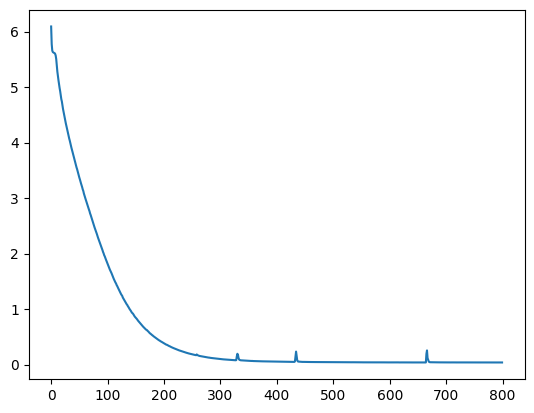

In [13]:
history=model.fit(X,y,epochs=800,verbose=1)
losses=history.history['loss']
plt.plot(losses)

In [14]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text


In [15]:
generated_text = generate_text("levarage",30, max_input_length)
print(generated_text)

levarage the journey toward realizing the full potential of ai is ongoing marked by breakthroughs setbacks and ethical dilemmas requiring collective effort to shape a future where ai enriches humanity while


In [16]:
generated_text = generate_text("profound",30, max_input_length)
print(generated_text)

profound questions as regarding ai's societal impact privacy implications bias in algorithms and the potential for job displacement loom large and alignment with human values becomes imperative is while and speech


In [17]:
generated_text = generate_text("possibility",30, max_input_length)
print(generated_text)

possibility the journey toward realizing the full potential of ai is ongoing marked by breakthroughs setbacks and ethical dilemmas requiring collective effort to shape a future where ai enriches humanity while


In [18]:
generated_text = generate_text("innovation",55, max_input_length)
print(generated_text)

innovation from diverse disciplines such as computer science mathematics neuroscience and philosophy ai seeks to imbue machines with the capacity to perceive reason learn and act intelligently much like humans do might be missed and human domains them solutions human be human domains human logistics human logistics becomes without performance human logistics human logistics them boundless


In [19]:
generated_text = generate_text("sex",30, max_input_length)
print(generated_text)

sex the journey toward realizing the full potential of ai is ongoing marked by breakthroughs setbacks and ethical dilemmas requiring collective effort to shape a future where ai enriches humanity while


In [20]:
generated_text = generate_text("internet",50, max_input_length)
print(generated_text)

internet the journey toward realizing the full potential of ai is ongoing marked by breakthroughs setbacks and ethical dilemmas requiring collective effort to shape a future where ai enriches humanity while preserving its essence from efficiency and boundless explicit programming new boundless possibilities of artificial human machines to perceive performance without
